## Resume Data Extraction 

In [1]:
import re

In [2]:
import pdfplumber
pdf = pdfplumber.open('RESUME.pdf')
page = pdf.pages[0]
text = page.extract_text()
print(text)
pdf.close()

SHARATH M P
Mobile：7022446661
Email：sharath8055@gmail.com
LinkedIn: www.linkedin.com/in/sharathmp
Profile
A Proactive & fast learning individual seeking an opportunity in an organization which recognize and
utilizes my analytical and methodical skills in Machine learning domain to help the company achieve
itsbusinessgoals.
Education
MasterofScienceinWebTechnology 2012-2013
UniversityofGreenwich,London
BachelorofEngineeringinElectronicsandCommunication 2006-2010
VisveswaraiahTechnologicalUniversity,Bangalore
Courses
PostGraduatePrograminDataScience Jul.2019-Dec.2019
INSOFE,Bangalore
Data Science Projects
Titanic:MachineLearningfromDisaster
Following Kaggle competition required machine learning to create a model that predicts which passengers
survived the Titanic shipwreck. Using python, Random forest and XGBoost was implemented to predict the
necessaryresult.
Hackathon:
Participated in one day hackathon organized by INSOFE, Bangalore to build a prediction model for Singapore
Flatresalep

#### Extracting Mobile Number 

In [3]:
mobile=re.compile(r'\d{10}')
matches=mobile.findall(text)
for match in matches:
    print(match)

7022446661


#### Extracting E-Mail Id

In [4]:
email=re.compile(r'\w+@\w+.\w+')
matches=email.findall(text)
for match in matches:
    print(match)

sharath8055@gmail.com


#### Extracting Year of Graduation 

In [5]:
grad=re.compile(r'\d{4}-\d{4}')
matches=grad.findall(text)
for match in matches:
    print(match)

2012-2013
2006-2010


# Sentiment Analysis using Twitter Data

In [34]:

import random
import pandas as pd


import re
import nltk

import tweepy 
from tweepy.auth import OAuthHandler
from textblob import *

import warnings
warnings.filterwarnings("ignore")

In [35]:
def initialize(): 

    # keys and tokens from the Twitter Dev Console 
    consumer_key = 'sbjcMH5dWQ9HJhpEI8FiBmyPD'
    consumer_secret = 'K5DZlRJvtad4Hv7w1x7OpAiSh6xtjAsPRFkhJnvBFQneZhEK2T'
    access_token = '53835695-v5bGz3Sjh16QgYhI0mvVbk5kFMKNGi48AG4iy3MiD'
    access_token_secret = 'ADfaOkVIZMJEMJWR7TgmyNfbcVuRTwDBoln9yefJtsiAv'

    # attempt authentication 
    try: 
        # create OAuthHandler object 
        auth = OAuthHandler(consumer_key, consumer_secret) 
        # set access token and secret 
        auth.set_access_token(access_token, access_token_secret) 
        # create tweepy API object to fetch tweets 
        api = tweepy.API(auth) 
        print('Authentication Success')
        return(api)

    except Exception as e: 
        print("Error: Authentication Failed")
        print(e)

In [36]:
def get_tweets(api,query, count = 100): 
    
    # empty list to store parsed tweets 
    tweets = [] 

    try: 
        # call twitter api to fetch tweets 
        fetched_tweets = api.search(q = query, count = count)

        # parsing tweets one by one 
        for tweet in fetched_tweets: 
            # empty dictionary to store required params of a tweet 
            parsed_tweet = {} 

            # saving text of tweet 
            parsed_tweet['text'] = tweet.text
            parsed_tweet['date'] = tweet.created_at

            # saving sentiment of tweet 
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 

            # appending parsed tweet to tweets list 
            if(tweet.retweet_count > 0): 
                # if tweet has retweets, ensure that it is appended only once 
                if(parsed_tweet not in tweets): 
                    tweets.append(parsed_tweet) 
            else: 
                tweets.append(parsed_tweet) 

        # return parsed tweets 
        return(tweets) 

    except tweepy.TweepError as e: 
        # print error (if any) 
        print("Error : " + str(e)) 

In [37]:
def clean_tweet(tweets): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    #print(tweets)
    return(' '.join(re.sub("([,\.():;!$%^&*\d])|([^0-9A-Za-z \t])", " ", tweets).split())) 

In [38]:
def get_tweet_sentiment(tweet): 
    
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return('positive')
    elif analysis.sentiment.polarity == 0: 
        return ('neutral')
    else: 
        return ('negative')

---
## Implementation for Upcoming mobile #One plus 8 Pro

In [39]:
api_initialization = initialize()

Authentication Success


In [40]:
retreived_tweets = get_tweets(api=api_initialization,query='OnePlus 8 Pro', count = 200)

In [41]:
retreived_tweets

[{'text': 'CheckOut #OnePlus8Pro Specifications, Price, Release Date Mykiweb https://t.co/oG9f0uRTnb #oneplus8lite… https://t.co/ZuCKPzHHkf',
  'date': datetime.datetime(2020, 3, 28, 13, 24, 19),
  'sentiment': 'neutral'},
 {'text': 'RT @cnetfrance: #OnePlus8 et #8Pro : des fiches techniques et un rendu presse en fuite https://t.co/LdGYrkWwvy https://t.co/8CUAE0GRXp',
  'date': datetime.datetime(2020, 3, 28, 13, 2, 23),
  'sentiment': 'neutral'},
 {'text': 'Los OnePlus 8, al descubierto: filtran todas las características de la nueva serie de teléfonos de la marca. https://t.co/hIMiM96YWi',
  'date': datetime.datetime(2020, 3, 28, 12, 57, 25),
  'sentiment': 'neutral'},
 {'text': 'Everything you need to know about the OnePlus 8, 8 Lite, and 8 Pro!.\nhttps://t.co/329BcC5FFw',
  'date': datetime.datetime(2020, 3, 28, 12, 54, 13),
  'sentiment': 'neutral'},
 {'text': 'Les rendus du OnePlus 8 Pro révèlent un design plus traditionnel et classique https://t.co/TRA916G1S1 via @BlogNT',
  'date

In [42]:
len(retreived_tweets)

100

---
## Tweets

In [43]:
tweets=[i['text'] for i in retreived_tweets]

In [44]:
refined_tweets = list(map(clean_tweet,tweets))

In [45]:
refined_tweets

['CheckOut OnePlus Pro Specifications Price Release Date Mykiweb https t co oG f uRTnb oneplus lite https t co ZuCKPzHHkf',
 'RT cnetfrance OnePlus et Pro des fiches techniques et un rendu presse en fuite https t co LdGYrkWwvy https t co CUAE GRXp',
 'Los OnePlus al descubierto filtran todas las caracter sticas de la nueva serie de tel fonos de la marca https t co hIMiM YWi',
 'Everything you need to know about the OnePlus Lite and Pro https t co BcC FFw',
 'Les rendus du OnePlus Pro r v lent un design plus traditionnel et classique https t co TRA G S via BlogNT',
 'RT Alex MN Oooooh mon dieu le One plus pro il est siiii beauuuuuuu Il a tout oneplus fr',
 'RT senactu com OnePlus Pro et Lite prix date de sortie fiche technique le point sur toutes les infos https t co nbwWoL tuf',
 'RT Fredzone OnePlus amp OnePlus Pro toutes les caract ristiques en fuite https t co nSiekRAjrL https t co RRFQGDmhM',
 'RT Florianseves OnePlus et OnePlus Pro les fiches techniques se pr cisent https t co feI


## Sentiment

In [46]:
tweets_sentiment = list(map(get_tweet_sentiment,refined_tweets))

---
## Getting the Info to Dataframe

In [47]:
final_df = pd.DataFrame(columns=['Refined_Tweets','Sentiment'])

In [48]:
final_df.Refined_Tweets = refined_tweets
final_df.Sentiment = tweets_sentiment

In [49]:
final_df

,Refined_Tweets,Sentiment
0,CheckOut OnePlus Pro Specifications Price Rele...,neutral
1,RT cnetfrance OnePlus et Pro des fiches techni...,neutral
2,Los OnePlus al descubierto filtran todas las c...,neutral
3,Everything you need to know about the OnePlus ...,neutral
4,Les rendus du OnePlus Pro r v lent un design p...,neutral
5,RT Alex MN Oooooh mon dieu le One plus pro il ...,neutral
6,RT senactu com OnePlus Pro et Lite prix date d...,neutral
7,RT Fredzone OnePlus amp OnePlus Pro toutes les...,neutral
8,RT Florianseves OnePlus et OnePlus Pro les fic...,neutral
9,RT Fredzone OnePlus amp OnePlus Pro toutes les...,neutral



## Visualization

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,8]

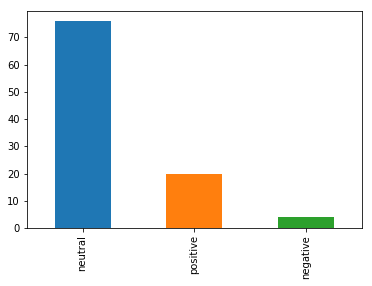

In [51]:
final_df['Sentiment'].value_counts().plot(kind = "bar")

---
## Implementation for Upcoming mobile #Xiaomi Mi 10 Pro 

In [52]:
retreived_tweets = get_tweets(api=api_initialization,query='Xiaomi Mi 10 Pro ', count = 100)

In [53]:
retreived_tweets

[{'text': 'RT @FoneArenaTamil: Xiaomi Mi 10 Lite 5G, Mi TV 4S 65", realme X2, X2 Pro &amp; Redmi Note 8 Pro Android 10 update | TVT 313 https://t.co/SzfQN…',
  'date': datetime.datetime(2020, 3, 28, 13, 31, 36),
  'sentiment': 'neutral'},
 {'text': 'RT @FoneArenaTamil: Xiaomi Mi 10 Lite 5G, Mi TV 4S 65", realme X2, X2 Pro &amp; Redmi Note 8 Pro Android 10 update | TVT 313 https://t.co/SzfQN…',
  'date': datetime.datetime(2020, 3, 28, 13, 31, 32),
  'sentiment': 'neutral'},
 {'text': 'Xiaomi Mi 10 Lite 5G, Mi TV 4S 65", realme X2, X2 Pro &amp; Redmi Note 8 Pro Android 10 update | TVT 313 https://t.co/SzfQNDNrmp',
  'date': datetime.datetime(2020, 3, 28, 13, 31, 26),
  'sentiment': 'neutral'},
 {'text': 'Nouveau concour , pour tenter de gagner les nouveaux Xiaomi mi 10 pro en couleur bleue  256gb , abonne-toi à… https://t.co/lgkzaQQCyl',
  'date': datetime.datetime(2020, 3, 28, 13, 27, 36),
  'sentiment': 'neutral'},
 {'text': '@henreeneo 1. Samsung s20\n2. Samsung Note 10\n3. Samsung s2

In [54]:
len(retreived_tweets)

100

---
## Tweets

In [55]:
tweets=[i['text'] for i in retreived_tweets]

In [56]:
refined_tweets = list(map(clean_tweet,tweets))

In [57]:
refined_tweets

['RT FoneArenaTamil Xiaomi Mi Lite G Mi TV S realme X X Pro amp Redmi Note Pro Android update TVT https t co SzfQN',
 'RT FoneArenaTamil Xiaomi Mi Lite G Mi TV S realme X X Pro amp Redmi Note Pro Android update TVT https t co SzfQN',
 'Xiaomi Mi Lite G Mi TV S realme X X Pro amp Redmi Note Pro Android update TVT https t co SzfQNDNrmp',
 'Nouveau concour pour tenter de gagner les nouveaux Xiaomi mi pro en couleur bleue gb abonne toi https t co lgkzaQQCyl',
 'henreeneo Samsung s Samsung Note Samsung s Ultra Samsung Galaxy Bud Xioami Mi Note X https t co nMBUQljiZh',
 'RT fraanb Xiaomi Mi Pro a euros pero c mo se pasa Apple con los precios no',
 'Que caro el nuevo Xiaomi Mi Pro ahora ya no podr n decir que es el mejor en calidad precio',
 'Est ce que je d pense mon argent dans le tout dernier Xiaomi mi pro g',
 'RT SoyaCincauBM Seriau tengok specs dia Macam mana Huawei P nak lawan lagu ni https t co esk qT oob',
 'RT fraanb Xiaomi Mi Pro a euros pero c mo se pasa Apple con los precios no'


## Sentiment

In [58]:
tweets_sentiment = list(map(get_tweet_sentiment,refined_tweets))

---
## Getting the Info to Dataframe

In [59]:
final_df = pd.DataFrame(columns=['Refined_Tweets','Sentiment'])

In [60]:
final_df.Refined_Tweets = refined_tweets
final_df.Sentiment = tweets_sentiment

In [61]:
final_df

,Refined_Tweets,Sentiment
0,RT FoneArenaTamil Xiaomi Mi Lite G Mi TV S rea...,neutral
1,RT FoneArenaTamil Xiaomi Mi Lite G Mi TV S rea...,neutral
2,Xiaomi Mi Lite G Mi TV S realme X X Pro amp Re...,neutral
3,Nouveau concour pour tenter de gagner les nouv...,neutral
4,henreeneo Samsung s Samsung Note Samsung s Ult...,neutral
5,RT fraanb Xiaomi Mi Pro a euros pero c mo se p...,neutral
6,Que caro el nuevo Xiaomi Mi Pro ahora ya no po...,neutral
7,Est ce que je d pense mon argent dans le tout ...,neutral
8,RT SoyaCincauBM Seriau tengok specs dia Macam ...,neutral
9,RT fraanb Xiaomi Mi Pro a euros pero c mo se p...,neutral



## Visualization

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]

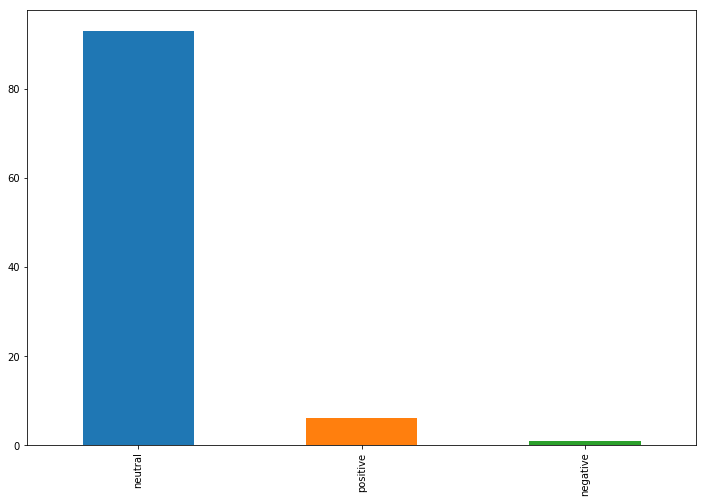

In [63]:
final_df['Sentiment'].value_counts().plot(kind = "bar")

## Extracting corona from tweets

In [64]:
retreived_tweets = get_tweets(api=api_initialization,query='coronainindia', count = 200)

In [65]:
retreived_tweets

[{'text': 'RT @SanskarOfficial: परम पूज्य सुलभ शांतु गुरु जी ने बृताए #Corona से कैसे बचें क्या करें और किन चीजों से रहें दूर\n#COVID2019india #stage3…',
  'date': datetime.datetime(2020, 3, 28, 13, 34, 9),
  'sentiment': 'neutral'},
 {'text': '#coronainindia #Lockdown21\n#uniteworldexceptchina\nAll nations of the world need to unite ..and boycott China, a nat… https://t.co/hRcgcSDS7P',
  'date': datetime.datetime(2020, 3, 28, 13, 32, 5),
  'sentiment': 'neutral'},
 {'text': 'परम पूज्य सुलभ शांतु गुरु जी ने बृताए #Corona से कैसे बचें क्या करें और किन चीजों से रहें दूर\n#COVID2019india… https://t.co/qkJzzNbzmS',
  'date': datetime.datetime(2020, 3, 28, 13, 30),
  'sentiment': 'neutral'},
 {'text': 'RT @UCBrowser: Did you wash your hand today?\nUC Browser, For Fastest &amp; Newest Content\n(Data change from March 27 21:00 to March 28 18:00 by…',
  'date': datetime.datetime(2020, 3, 28, 13, 22, 17),
  'sentiment': 'neutral'},
 {'text': 'RT @SriRudyBABA: INDIA 27/03/2020 #21daysLockdown\n#

In [66]:
len(retreived_tweets)

100

In [67]:
tweets=[i['text'] for i in retreived_tweets]

In [68]:
refined_tweets = list(map(clean_tweet,tweets))

In [69]:
refined_tweets

['RT SanskarOfficial Corona COVID india stage',
 'coronainindia Lockdown uniteworldexceptchina All nations of the world need to unite and boycott China a nat https t co hRcgcSDS P',
 'Corona COVID india https t co qkJzzNbzmS',
 'RT UCBrowser Did you wash your hand today UC Browser For Fastest amp Newest Content Data change from March to March by',
 'RT SriRudyBABA INDIA daysLockdown CoronavirusLockdown coronainindia CoronaTuMarona CoronaVirusUpdate Corona CoronaVir',
 'RT HindiKhabar BreakingNews',
 'Did you wash your hand today UC Browser For Fastest amp Newest Content Data change from March to March https t co zDYVtKsTvk',
 'RT MyNation net daysLockdown CoronavirusLockdown coronainindia CoronaTuMarona CoronaVirusUpdate Corona CoronaVirusChallenge WIO',
 'RT SriRudyBABA INDIA daysLockdown CoronavirusLockdown coronainindia CoronaTuMarona CoronaVirusUpdate Corona CoronaVir',
 'RT SriRudyBABA daysLockdown CoronavirusLockdown coronainindia CoronaTuMarona CoronaVirusUpdate Corona CoronaVir

## Similarity between words using Spacy

In [6]:
import spacy 

In [11]:
nlp = spacy.load('en_core_web_sm') 

In [21]:
print("Enter two space-separated words") 
words = input() 
  
tokens = nlp(words) 
  
for token in tokens: 
    
    print(token.text, token.has_vector, token.vector_norm, token.is_oov) 
  
token1, token2 = tokens[0], tokens[1] 
  
print("Similarity:", token1.similarity(token2)) 

Enter two space-separated words
banana apple
banana True 19.761387 True
apple True 19.523342 True


C:\Users\Sharo\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


Similarity: 0.38154927


In [22]:
print("Enter two space-separated words") 
words = input() 
  
tokens = nlp(words) 
  
for token in tokens: 
    
    print(token.text, token.has_vector, token.vector_norm, token.is_oov) 
  
token1, token2 = tokens[0], tokens[1] 
  
print("Similarity:", token1.similarity(token2)) 

Enter two space-separated words
banana pizza
banana True 19.67872 True
pizza True 18.675457 True


C:\Users\Sharo\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


Similarity: 0.32136667


## Similarity  between Documents using Spacy

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm') 

In [33]:
def get_file_contents(filename):
  with open(filename, 'r') as filehandle:  
    filecontent = filehandle.read()
    return (filecontent) 
 
txt1="chris.txt"
txt2="chris1.txt"
txt3="chris2.txt"
 
fn1=get_file_contents(txt1)
print (doc1)
 
fn2=get_file_contents(txt2)
print (doc2)
 
fn3=get_file_contents(txt3)
print (doc3)
  
doc1 = nlp(fn1)
doc2 = nlp(fn2)
doc3 = nlp(fn3)
  
print ("chris - chris1")
print (doc1.similarity(doc2)) 
print ("chris1 - chris2")
print (doc2.similarity(doc3)) 
print ("chris1 - chris3")
print (doc1.similarity(doc3)) 

If you fast forward through the horrible singing, you will find a classic fairy tale underneath. Christopher Walken is very humorous and surprisingly good in the role. His trademark style of acting works well for the sly Puss in Boots. The other actors are well for their parts. I did not find any of the acting terribly fake or awkward. The king in particular appears a real dunce though, and I wonder if he is supposed to be. I can not remember the original tale. The special effects are typical of the eighties, but at least they are not overly fake like some of the computer generated fare that we see today. Overall, I recommend this movie for children and adults who are a child at heart.
This film isn't just about a school shooting, in fact its never even seen. But that just adds to the power this film has. Its about people and how they deal with tragedy. I know it was shown to the students who survived the Columbine shooting and it provided a sense of closure for a lot of them. The acti

C:\Users\Sharo\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.91930994540401
chris1 - chris2


C:\Users\Sharo\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.8947423510771217
chris1 - chris3


C:\Users\Sharo\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9163647042639145
